In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn  
# 標準正規乱数はよく使うので，randn として importしておく

# 20

In [2]:
def f(x):
    return np.exp(beta_0+beta*x)/(1+np.exp(beta_0+beta*x))

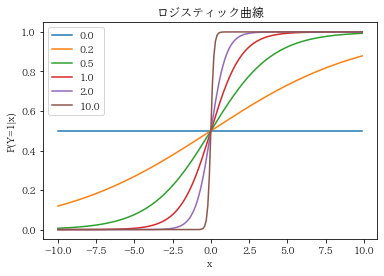

In [3]:
beta_0=0
beta_seq=np.array([0,0.2,0.5,1,2,10])
x_seq=np.arange(-10,10,0.1)

plt.xlabel("x")
plt.ylabel("P(Y=1|x)")
plt.title("ロジスティック曲線")
for i in range(beta_seq.shape[0]):
    beta=beta_seq[i]
    p=f(x_seq)
    plt.plot(x_seq,p,label='{}'.format(beta))
plt.legend(loc='upper left')

βが大きいと0,1を取るxの値の範囲が大きくなる

# 22

## (a)

In [6]:
# (a)
def f(x):
    return x**2 - 1

def df(x):
    return 2 * x

In [9]:
x = 2  # 初期値
for i in range(100):
    x = x - f(x)/df(x)
x

1.0

In [10]:
x = -2  # 初期値
for i in range(100):
    x = x - f(x)/df(x)
x

-1.0

初期値によって結果が変化する

## (b)

In [25]:
def f(z):
    return z[0]**2 + z[1]**2 - 1

def dfx(z):
    return 2 * z[0]

def dfy(z):
    return 2 * z[1]

def g(z):
    return z[0] + z[1]

def dgx(z):
    return 1

def dgy(z):
    return 1

In [41]:
# 初期値
z = np.array([1,2])

for i in range(100):
    jacob = np.array([[dfx(z), dfy(z)], [dgx(z), dgy(z)]])
    z = z - np.linalg.inv(jacob) @ np.array([f(z), g(z)])
z

array([-0.70710678,  0.70710678])

In [37]:
f(z)

2.220446049250313e-16

In [38]:
g(z)

0.0

# 24

In [85]:
N=1000;p=2
X=randn(N,p) 
X=np.insert(X, 0, 1, axis=1)

beta=randn(p+1)
y=[]
prob=1/(1+np.exp(X@beta))
for i in range(N):
    if (np.random.rand(1)>prob[i]):
        y.append(1)
    else :
        y.append(-1)
#データの生成ここまで
beta #確認

array([ 0.27354637, -0.79023769, -0.56008867])

In [86]:
#最尤推定
beta=np.inf
gamma=randn(p+1) #betaの初期値
print(gamma)
while (np.sum((beta-gamma)**2)>0.001):
    beta=gamma
    s = X@beta
    v = np.exp(-s*y)
    u = (y*v)/(1+v)  # (N,)
    w = v/(1+v)**2  # (N,)
    W = np.diag(w)  # (N,N)
#     z = s+np.linalg.inv(W)@u
    z = s+u/w
    
    gamma=np.linalg.inv(X.T@W@X)@X.T@W@z
    print (gamma)

[-0.33428039  0.22143339  0.66992771]
[ 0.51888725 -0.78928996 -0.88863161]
[ 0.33084951 -0.69627619 -0.47931478]
[ 0.35991843 -0.72019921 -0.53852051]
[ 0.36072105 -0.72118442 -0.54006077]


In [87]:
#最尤推定
beta=np.inf
gamma=randn(p+1) #betaの初期値
print(gamma)
while (np.sum((beta-gamma)**2)>0.001):
    beta=gamma
    s = X@beta
    v = np.exp(-s*y)
    u = (y*v)/(1+v)  # (N,)
    w = v/((1+v)**2)  # (N,)
    W = np.diag(w)  # (N,N)
    z = s+np.linalg.inv(W)@u
#     z = s+u/w
    
    gamma=np.linalg.inv(X.T@W@X)@X.T@W@z
    print (gamma)

[-0.22056626  0.35376614  0.93817104]
[ 0.55913902 -1.00523596 -1.32855746]
[ 0.2379085  -0.53480288 -0.17026447]
[ 0.34226452 -0.68792115 -0.50019611]
[ 0.36029552 -0.72037203 -0.53923891]
[ 0.36072147 -0.72118493 -0.54006155]


s+np.linalg.inv(W)@u と s+u/w が同値になる(なんで？)

# 26

In [94]:
# データの生成
n=100
x=np.concatenate([randn(n)+1,randn(n)-1],0)
y=np.concatenate([np.ones(n), -np.ones(n)], 0)

train=np.random.choice(2*n,int(n),replace=False) # 訓練データの添え字
test=list(set(range(2*n))-set(train))     # テストデータの添え字
X=np.insert(x[train].reshape(-1,1), 0, 1, axis=1)
Y=y[train]
# すべて1の列をxの左において、2列とした

# gammaの初期値によっては収束しないので、複数回施行することがある
p=1
beta=[0,0]; gamma=randn(p+1)
print(gamma)
while (np.sum((beta-gamma)**2)>0.001):
    beta=gamma
    s=X@beta
    v=np.exp(-s*Y)
    u=(Y*v)/(1+v)
    w=v/((1+v)**2)
    W=np.diag(w)
    z=s+u/w
    gamma=np.linalg.inv(X.T@W@X)@X.T@W@z
    print (gamma)

[0.1707457  1.08776238]
[0.15394492 1.4000646 ]
[0.15192797 1.48210518]
[0.15189457 1.48662295]


In [145]:
def table_count(m,u,v):
    n=u.shape[0]
    count=np.zeros([m,m])
    for i in range(n):
        count[int(u[i]), int(v[i])] += 1
    return count

In [112]:
ans=y[test] # 正解
pred= np.sign(gamma[0]+x[test]*gamma[1])
ans=(ans+1)/2   # -1,1から0,1になおす
pred=(pred+1)/2   # -1,1から0,1になおす
table_count(2 ,ans, pred)

array([[45., 11.],
       [ 5., 39.]])

# 28

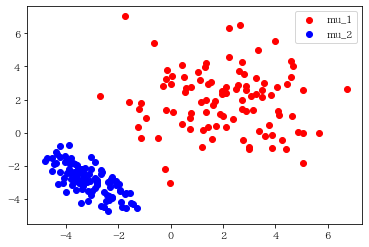

In [28]:
# 真のパラメータ
mu_1=np.array([2,2]); sigma_1=2; sigma_2=2; rho_1=0
mu_2=np.array([-3,-3]); sigma_3=1; sigma_4=1; rho_2=-0.8

# 真のパラメータに基づいてデータを発生
n=100
u=randn(n);v=randn(n)
x_1=sigma_1*u+mu_1[0]; y_1=(rho_1*u+np.sqrt(1-rho_1**2)*v)*sigma_2+mu_1[1]
u=randn(n);v=randn(n)
x_2=sigma_3*u+mu_2[0]; y_2=(rho_2*u+np.sqrt(1-rho_2**2)*v)*sigma_4+mu_2[1]

# 生成したデータの可視化
plt.scatter(x_1, y_1, label="mu_1", c="red")
plt.scatter(x_2, y_2, label="mu_2", c="blue")
plt.legend()

共分散行列が等しいことを仮定しない場合

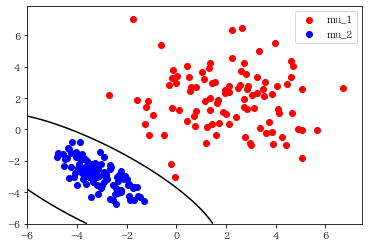

In [99]:
# データからパラメータを推定
mu_1=np.average((x_1,y_1),1); mu_2=np.average((x_2,y_2),1)
df=np.array([x_1,y_1]); mat=np.cov(df,rowvar=1); inv_1=np.linalg.inv(mat); de_1=np.linalg.det(mat)
df=np.array([x_2,y_2]); mat=np.cov(df,rowvar=1); inv_2=np.linalg.inv(mat); de_2=np.linalg.det(mat)

# 推定されたパラメータを分布の式に代入
def f(x,mu,inv,de):
    return(-0.5*(x-mu).T@inv@(x-mu)-0.5*np.log(de))
def f_1(u,v):
    return f(np.array([u,v]),mu_1, inv_1, de_1)
def f_2(u,v):
    return f(np.array([u,v]),mu_2, inv_2, de_2)

# 等高線データを作成
# この値が0の箇所に境界線をひく
pi_1=0.5; pi_2=0.5
u=v=np.linspace(-6,6,50)
m=len(u)
w=np.zeros([m,m])
for i in range(m):
    for j in range(m):
        w[i,j]=np.log(pi_1)+f_1(u[i],v[j])-np.log(pi_2)-f_2(u[i],v[j])
        
# 境界線とデータをプロット
plt.contour(u,v,w,levels=0,colors=['black'])
plt.scatter(x_1, y_1, label="mu_1", c="red")
plt.scatter(x_2, y_2, label="mu_2", c="blue")
plt.legend()

共分散行列が等しいことを仮定する場合

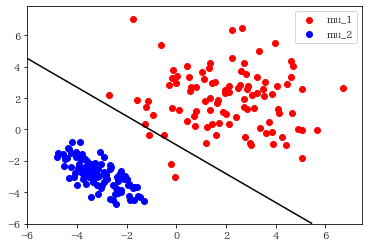

In [98]:
# データからパラメータを推定
mu_1=np.average((x_1,y_1),1); mu_2=np.average((x_2,y_2),1)
xx = np.concatenate([x_1, x_2])
yy = np.concatenate([y_1, y_2])
df = np.array([xx, yy])
mat=np.cov(df,rowvar=1); inv_1=np.linalg.inv(mat); de_1=np.linalg.det(mat)
mat=np.cov(df,rowvar=1); inv_2=np.linalg.inv(mat); de_2=np.linalg.det(mat)

# 推定されたパラメータを分布の式に代入
def f(x,mu,inv,de):
    return(-0.5*(x-mu).T@inv@(x-mu)-0.5*np.log(de))
def f_1(u,v):
    return f(np.array([u,v]),mu_1, inv_1, de_1)
def f_2(u,v):
    return f(np.array([u,v]),mu_2, inv_2, de_2)

# 等高線データを作成
# この値が0の箇所に境界線をひく
pi_1=0.5; pi_2=0.5
u=v=np.linspace(-6,6,50)
m=len(u)
w=np.zeros([m,m])
for i in range(m):
    for j in range(m):
        w[i,j]=np.log(pi_1)+f_1(u[i],v[j])-np.log(pi_2)-f_2(u[i],v[j])
        
# 境界線とデータをプロット
plt.contour(u,v,w,levels=0,colors=['black'])
plt.scatter(x_1, y_1, label="mu_1", c="red")
plt.scatter(x_2, y_2, label="mu_2", c="blue")
plt.legend()

# 29

事前確率がすべて等しい場合

In [42]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target_names
x=iris.data
y=iris.target
n=len(x)
train=np.random.choice(n,int(n/2),replace=False)
test= np.array(list(set(range(n))-set(train)))

In [44]:
## パラメータを推定する
X=x[train,:]
Y=y[train]
mu=[]
covv=[]
for j in range(3):
    xx=X[Y==j,:]
    mu.append(np.mean(xx,0))
    covv.append(np.cov(xx,rowvar=0))

In [45]:
## 推定されたパラメータを代入する分布の定義式
def f(w,mu,inv,de):
    return -0.5*(w-mu).T@inv@(w-mu)-0.5*np.log(de)
def g(v,j):
    return f(v,mu[j],np.linalg.inv(covv[j]),np.linalg.det(covv[j]))

z = []
for i in test:
    a = g(x[i,],0)
    b = g(x[i,],1)
    c = g(x[i,],2)
    if a<b:
        if b<c:
            z.append(2)
        else:
            z.append(1)
    else:
        z.append(0)


table_count(3,y[test],z)  # 26で作成した関数を使用

array([[27.,  0.,  0.],
       [ 0., 23.,  3.],
       [ 0.,  0., 22.]])

事前確率が0.5, 0.25 0.25の場合

In [103]:
from sklearn.datasets import load_iris

iris = load_iris()
n0 = int(len(iris.target)/3)
idx_0 = np.arange(n0)
idx_1 = np.random.choice(n0,int(n0/2),replace=False)+n0
idx_2 = np.random.choice(n0,int(n0/2),replace=False)+n0*2
idx = np.append(np.append(idx_0,idx_1),idx_2)
x=iris.data[idx]
y=iris.target[idx]
n=len(x)
train=np.random.choice(n,int(n/2),replace=False)
test= np.array(list(set(range(n))-set(train)))
prior_prob = [len(idx_0)/len(idx), len(idx_1)/len(idx), len(idx_2)/len(idx)]

In [104]:
## パラメータを推定する
X=x[train,:]
Y=y[train]
mu=[]
covv=[]
for j in range(3):
    xx=X[Y==j,:]
    mu.append(np.mean(xx,0))
    covv.append(np.cov(xx,rowvar=0))

In [105]:
## 推定されたパラメータを代入する分布の定義式
def f(w,mu,inv,de,pi):
    return -0.5*(w-mu).T@inv@(w-mu)-0.5*np.log(de)-np.log(pi)
def g(v,j):
    return f(v,mu[j],np.linalg.inv(covv[j]),np.linalg.det(covv[j]), prior_prob[j])

z = []
for i in test:
    a = g(x[i,],0)
    b = g(x[i,],1)
    c = g(x[i,],2)
    if a<b:
        if b<c:
            z.append(2)
        else:
            z.append(1)
    else:
        z.append(0)


table_count(3,y[test],z)  # 26で作成した関数を使用

array([[22.,  0.,  0.],
       [ 0., 12.,  0.],
       [ 0.,  5., 11.]])

# 30

In [143]:
# スクラッチ

# 各点とのノルムを計算する関数
def _get_norm(X, y, target, k):
    distance = np.full(X.shape[0], np.inf)
    for i in range(X.shape[0]):
        # ノルム計算
        distance[i] = np.linalg.norm(target - X[i,:], ord=2)
    return y[np.argsort(distance)]

# k近傍法(1つの入力に対して)
def _knn_one(X, y, target, k):
    mode = [0,0]
    # ノルム計算
    nn = _get_norm(X, y, target, k)
    while len(mode)>1:
        # 最頻値獲得
        count = np.bincount(nn[:k])
        mode = [idx for idx, value in enumerate(count) if value==max(count)]
        k -= 1
    return mode[0]

# k近傍法(１つ以上の入力に対して)
def knn(X, y, targets, k):
    # 入力が１つの場合
    if len(targets.shape)==1:
        assert X.shape[1]==targets.shape[0], \
            "Data size dose not match."
        return _knn_one(X, y, targets, k)
    # 入力が２つ以上の場合
    else:
        modes = np.empty(targets.shape[0])
        assert X.shape[1]==targets.shape[1], \
            "Data size dose not match."
        for idx in range(targets.shape[0]):
            modes[idx] = _knn_one(X, y, targets[idx,:], k)
        return modes

In [148]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target_names
x=iris.data
y=iris.target

n=x.shape[0]
train=np.random.choice(n, int(n/2), replace=False)
test=list(set(range(n))-set(train))

w=knn(x[train,],y[train],x[test,],k=3)
table_count(3,y[test],w)

array([[26.,  0.,  0.],
       [ 0., 21.,  3.],
       [ 0.,  1., 24.]])

# 31

Text(0.3, 0.5, 'AUC=0.9242266000000001')

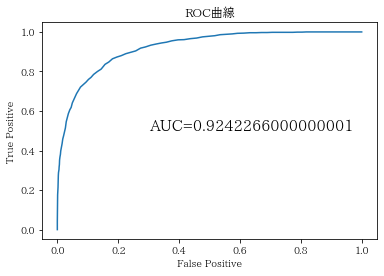

In [150]:
N_0=10000;N_1=1000
mu_1=1;mu_0=-1  #病気の人1，正常な人0
var_1=1;var_0=1
x=np.random.normal(mu_0,var_0,N_0)
y=np.random.normal(mu_1,var_1,N_1)

theta_seq=np.exp(np.arange(-10,100,0.1))

U=[]; V=[]
for i in range(len(theta_seq)):
    u=np.sum((stats.norm.pdf(x,mu_1,var_1)/stats.norm.pdf(x,mu_0,var_0))>theta_seq[i])/N_0 #病気でない人を病気とみなす
    v=np.sum((stats.norm.pdf(y,mu_1,var_1)/stats.norm.pdf(y,mu_0,var_0))>theta_seq[i])/N_1 #病気の人を病気とみなす
    U.append(u); V.append(v)
    
AUC=0 #面積を求める
for i in range(len(theta_seq)-1):
    AUC += np.abs(U[i+1]-U[i])*V[i]
    
plt.plot(U,V)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC曲線")
plt.text( 0.3,0.5, 'AUC={}'.format(AUC),fontsize=15)